In [23]:
# from data_download import *
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
pd.set_option('display.max_columns', None)

In [79]:
import os
import sys
module_path = os.path.abspath( os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)
from src import data_download

In [24]:
# salespath = r'C:\Users\caell\flatiron\projects\phase_2_project\phase_2_project_chicago-sf-seattle-ds-082420\data\EXTR_RPSale.csv'
# parcelpath = r'C:\Users\caell\flatiron\projects\phase_2_project\phase_2_project_chicago-sf-seattle-ds-082420\data\EXTR_Parcel.csv'
# residentialpath = r'C:\Users\caell\flatiron\projects\phase_2_project\phase_2_project_chicago-sf-seattle-ds-082420\data\EXTR_ResBldg.csv'
# sales = pd.read_csv(salespath, encoding = 'ISO-8859-1')
#parcels = pd.read_csv(parcelpath, encoding = 'ISO-8859-1')
#residences = pd.read_csv(residentialpath, encoding = 'ISO-8859-1')

sales = pd.read_csv('../data/EXTR_RPSale.csv', encoding = 'ISO-8859-1')
residences = pd.read_csv('../data/EXTR_ResBldg.csv', encoding = 'ISO-8859-1')
parcels = pd.read_csv('../data/EXTR_Parcel.csv', encoding = 'ISO-8859-1')

/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
sales = sales[sales['DocumentDate'].astype(str).str.endswith('2019')]
sales.head()


,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
4,3027422,213043,120,12/20/2019,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C ...,SHAW HEATHER C ...,3,6,3,N,N,N,N,1,8,
49,2999169,919715,200,07/08/2019,192000,20190712001080,,,,,,,WAGNERESTATES LLC ...,SCHAFFER CORBIN ...,3,2,3,N,N,N,N,1,3,
98,3000673,894444,200,06/26/2019,185000,20190722001395,,,,,,,MAY THOMAS A+SHIRLEY E ...,KOCHEL RICHARD J+JANICE M ...,3,2,3,N,N,N,N,1,3,
210,3002257,940652,630,07/22/2019,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL ...,HANSON BRYAN L+KAILI ...,11,6,3,N,N,N,N,1,8,
420,3012934,615490,10,09/24/2019,775000,20190930002488,,,,,,,TALBOT MORGAN P ...,FICHTER CAROLINE ...,11,6,3,N,N,N,N,1,8,


In [26]:
combo = sales.merge(residences, on = ['Major','Minor'])
combo = combo.merge(parcels, on = ['Major','Minor'])
combo.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot_x,PlatBlock_x,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,PropName,PlatName,PlatLot_y,PlatBlock_y,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,3027422,213043,120,12/20/2019,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C ...,SHAW HEATHER C ...,3,6,3,N,N,N,N,1,8,,1,1,27033 NE DOROTHY ST 98019,27033,,NE,DOROTHY,ST,,98019,1.0,7,0,1930,0,0,0,0,0,1930,0,0,0,0,550,,180,0,0,5,2,0,,3,0,0,2,1,0,0,0,1989,0,0,0,0,3,0,,DUVALL HILLS DIV NO. 04,12,,6,26,13,SE,R,70.0,2.0,NaN,NaN,DUVALL,1155,R4.5,1,1,2,10523,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
1,3002257,940652,630,07/22/2019,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL ...,HANSON BRYAN L+KAILI ...,11,6,3,N,N,N,N,1,8,,1,1,22848 SE 264TH CT 98038,22848,,SE,264TH,CT,,98038,2.0,7,0,1057,0,918,0,0,0,1975,0,0,0,0,465,,45,0,0,5,2,0,,3,0,2,1,0,1,0,0,1994,0,0,0,0,3,2500,,WILDERNESS ESTATES,63,,6,22,27,SW,R,56.0,3.0,NaN,NaN,MAPLE VALLEY,1813,R-6,1,1,2,7392,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
2,3012934,615490,10,09/24/2019,775000,20190930002488,,,,,,,TALBOT MORGAN P ...,FICHTER CAROLINE ...,11,6,3,N,N,N,N,1,8,,1,1,10322 12TH AVE NW 98177,10322,,,12TH,AVE,NW,98177,1.0,7,0,1040,0,0,0,0,0,2080,1040,1040,7,0,0,N,0,0,0,5,1,100,N,4,0,1,1,1,0,0,0,1947,0,0,0,0,5,0,,NORTH VIEW TERRACE ADD,2,1,3,26,36,NW,R,39.0,3.0,NaN,NaN,SEATTLE,10,SF 7200,1,1,2,7102,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
3,2987598,402770,820,04/15/2019,0,20190514000666,,,,,,,WONG TIRSA TABADA-PR ...,WONG TIRSA TABADA ...,3,6,15,N,N,N,N,18,8,12 18 31 51,1,1,19421 58TH AVE NE 98028,19421,,,58TH,AVE,NE,98028,1.0,7,0,1490,0,0,0,0,0,2930,1490,1440,7,0,0,Y,0,70,380,5,3,0,,3,0,1,2,0,1,0,1,1978,0,0,0,0,3,0,,LAKE FOREST PARK ESTATES ADD,31-32,5,4,26,2,SW,R,38.0,1.0,NaN,NaN,KENMORE,1442,R6,1,1,2,8003,2,2,3,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
4,3030539,262404,9103,12/10/2019,0,20200121001491,,,,,,,JOHANSON ERIC A+WHITE 

In [41]:
# Made SqFtPorch row in combo df
combo['SqFtPorch'] =(combo['SqFtEnclosedPorch'] + combo['SqFtOpenPorch'])


In [81]:
combo.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot_x,PlatBlock_x,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,PropName,PlatName,PlatLot_y,PlatBlock_y,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems,SqFtPorch,TotFloorPlan
0,3027422,213043,120,12/20/2019,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C ...,SHAW HEATHER C ...,3,6,3,N,N,N,N,1,8,,1,1,27033 NE DOROTHY ST 98019,27033,,NE,DOROTHY,ST,,98019,1.0,7,0,1930,0,0,0,0,0,1930,0,0,0,0,550,,180,0,0,5,2,0,,3,0,0,2,1,0,0,0,1989,0,0,0,0,3,0,,DUVALL HILLS DIV NO. 04,12,,6,26,13,SE,R,70.0,2.0,NaN,NaN,DUVALL,1155,R4.5,1,1,2,10523,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,180,2660
1,3002257,940652,630,07/22/2019,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL ...,HANSON BRYAN L+KAILI ...,11,6,3,N,N,N,N,1,8,,1,1,22848 SE 264TH CT 98038,22848,,SE,264TH,CT,,98038,2.0,7,0,1057,0,918,0,0,0,1975,0,0,0,0,465,,45,0,0,5,2,0,,3,0,2,1,0,1,0,0,1994,0,0,0,0,3,2500,,WILDERNESS ESTATES,63,,6,22,27,SW,R,56.0,3.0,NaN,NaN,MAPLE VALLEY,1813,R-6,1,1,2,7392,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,45,1567
2,3012934,615490,10,09/24/2019,775000,20190930002488,,,,,,,TALBOT MORGAN P ...,FICHTER CAROLINE ...,11,6,3,N,N,N,N,1,8,,1,1,10322 12TH AVE NW 98177,10322,,,12TH,AVE,NW,98177,1.0,7,0,1040,0,0,0,0,0,2080,1040,1040,7,0,0,N,0,0,0,5,1,100,N,4,0,1,1,1,0,0,0,1947,0,0,0,0,5,0,,NORTH VIEW TERRACE ADD,2,1,3,26,36,NW,R,39.0,3.0,NaN,NaN,SEATTLE,10,SF 7200,1,1,2,7102,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,1040
6,2982060,347050,40,04/04/2019,648500,,,,,,,,BROWN MARK E+MARCIE K ...,MEDVED ROBERT J+JENNIFER E ...,11,6,3,N,N,N,N,1,8,,1,1,26034 231ST PL SE,26034,,,231ST,PL,SE,NaN,2.0,8,0,1390,0,1910,0,0,0,3300,0,0,0,0,590,,0,0,0,5,2,0,,5,1,0,2,1,0,0,0,2005,0,0,0,0,3,6000,,HOTSON ESTATES,4,,6,22,27,NW,R,56.0,3.0,NaN,NaN,MAPLE VALLEY,1813,R-4,1,1,2,5250,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,1980
10,2980836,937630,695,03/28/2019,550000,20190404001008,,,,

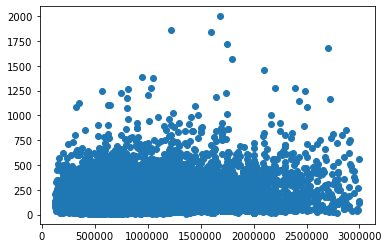

In [43]:
# Made SqFtPorch scatterplot to find linear correlation
porch = combo.loc[combo['SqFtPorch'] > 0, :]
plt.scatter(porch['SalePrice'], porch['SqFtPorch']);

In [61]:
# Made a sales vs. SqFtPorch correlation report
formula = 'SalePrice ~ SqFtPorch + SqFtDeck'
model = smf.ols(formula = formula, data = porch).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     849.1
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:32:07   Log-Likelihood:            -2.2576e+05
No. Observations:               15652   AIC:                         4.515e+05
Df Residuals:                   15649   BIC:                         4.515e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    6.65e+05   5683.187    117.005      0.000    6.54e+05    6.76e+05
SqFtPorch    836.3209     25.828     32.380      0.000     785.694     886.948
SqFtDeck     447.4167     17.011     26.302      0.000     414.073     480.760
==============================================================================
Omnibus:                     3969.427   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9790.546
Skew:                           1.399   Prob(JB):                         0.00
Kurtosis:                       5.680   Cond. No.                         419.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# Added TotFloorPlan column to check proportion of floor plan vs lot size
combo['TotFloorPlan'] = (combo['SqFtGarageAttached'] + combo['SqFtDeck'] + combo['SqFtPorch'] + combo['SqFt1stFloor'])

In [82]:
# Created 
PropLot = combo['TotFloorPlan'] / combo['SqFtLot']

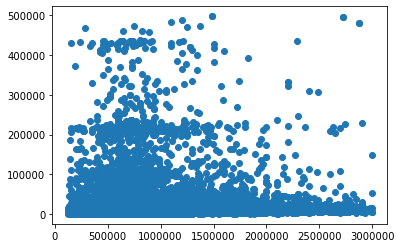

In [78]:
# Checked linearity of SqFtLot to SalePrice
normlot = combo[(combo['SqFtLot'] > 0) & (combo['SqFtLot'] <= 4000000)]
plt.scatter(normlot['SalePrice'], normlot['SqFtLot']);

In [30]:
combo = combo[(combo['SalePrice'] > 120000) & (combo['SalePrice'] < 3000000)]
combo.describe()

,ExciseTaxNbr,SalePrice,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PropertyClass,BldgNbr,NbrLivingUnits,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,Range,Township,Section,Area,SubArea,SpecArea,SpecSubArea,LevyCode,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,NbrBldgSites,Contamination,HistoricSite,CurrentUseDesignation
count,2.827100e+04,2.827100e+04,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.0,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,0.0,0.0,28271.000000,28271.000000,28271.000000,28271.000000,2.827100e+04,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.000000,28271.0,28271.000000,28271.0,28271.000000,28271.000000
mean,2.999269e+06,7.638689e+05,8.157228,6.000672,3.824591,1.895016,7.977963,1.021824,1.017403,1.559390,7.707120,0.0,1249.576704,44.472180,566.367514,16.208518,0.632804,0.535956,2165.703300,460.407272,290.374801,2.885466,82.778607,264.253935,78.190973,5.528032,130.939762,5.004103,2.112094,3.187754,3.455591,0.478370,0.531251,1.605426,0.630823,0.273567,0.062714,0.162216,1977.911429,96.321177,0.631000,0.136182,0.004811,3.428920,637.955467,4.600828,23.776379,18.460189,48.185278,5.742528,NaN,NaN,1579.036999,1.139224,1.001698,7.664108,1.637329e+04,1.970854,1.861554,3.933359,0.079056,1.014573,0.003573,1.269817,0.002122,0.020763,0.052103,0.062714,0.222489,0.018924,0.057232,0.044533,0.010435,0.023275,0.013264,0.092109,1.438541,0.019985,0.000601,0.005730,0.010399,0.056206,0.204096,0.0,0.008525,0.0,0.001026,0.005978
std,1.669250e+04,4.292329e+05,5.914956,0.060357,3.762404,3.694327,0.207506,0.321911,0.167530,0.544249,1.127006,0.0,489.742770,164.746411,680.899727,98.564382,20.449476,17.444949,937.928845,565.881970,436.729740,3.603211,181.485101,286.586508,122.897470,34.764293,208.749261,1.068366,0.575338,16.009547,0.958753,0.528177,0.649784,0.717745,0.616938,0.479957,0.251477,0.382037,32.079355,428.327373,6.682285,2.634092,0.422541,0.690399,2409.699946,1.152478,1.679084,10.260072,26.812428,4.038753,NaN,NaN,1830.818602,0.927473,0.153017,30.669878,5.973079e+04,0.174211,0.348838,0.279373,0.269831,0.204477,0.059665,0.962028,0.254557,0.234970,0.372007,0.395581,0.736259,0.226231,0.388252,0.337856,0.168214,0.263086,0.177035,0.822055,22.719855,0.191036,0.024515,0.110482,0.142610,2.223469,0.557115,0.0,0.154286,0.0,0.054824,0.127003
min,2.968844e+06,1.205110e+05,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.00

In [31]:
correlations = combo.corr()['SalePrice']

In [32]:
high_corrs = correlations.sort_values(ascending = False).head(20)
low_corrs = correlations.sort_values(ascending = True).head(20)

In [33]:
high_corrs

SalePrice           1.000000
BldgGrade           0.613175
SqFtTotLiving       0.595240
Township            0.411973
SqFt2ndFloor        0.382833
SqFt1stFloor        0.348877
BathFullCount       0.332382
SqFtOpenPorch       0.289061
Bedrooms            0.287549
Stories             0.284186
Territorial         0.249365
SqFtFinBasement     0.238870
SqFtTotBasement     0.226378
LakeWashington      0.214349
Bath3qtrCount       0.203050
FinBasementGrade    0.200473
SqFtDeck            0.196356
BathHalfCount       0.195206
Olympics            0.163414
FpMultiStory        0.162994
Name: SalePrice, dtype: float64

In [34]:
low_corrs

SaleInstrument      -0.104385
Condition           -0.063461
FpFreestanding      -0.062330
SaleReason          -0.060017
LevyCode            -0.056802
Access              -0.053369
PropertyClass       -0.050263
HeatSource          -0.045608
SubArea             -0.027550
Section             -0.025093
PresentUse          -0.012213
Area                -0.012032
StreetSurface       -0.007052
PcntNetCondition    -0.004411
HistoricSite        -0.003693
SqFtUnfinFull        0.001032
WfntPoorQuality      0.001570
PropertyType         0.001797
SqFtEnclosedPorch    0.004263
Obsolescence         0.004503
Name: SalePrice, dtype: float64

In [64]:
formula = 'SalePrice ~ SqFtTotLiving + SqFtPorch + SqFtDeck'
model = smf.ols(formula = formula, data = combo).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     5452.
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:33:18   Log-Likelihood:            -4.0033e+05
No. Observations:               28271   AIC:                         8.007e+05
Df Residuals:                   28267   BIC:                         8.007e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.696e+05   5177.918     32.750      0.000    1.59e+05     1.8e+05
SqFtTotLiving   254.0755      2.442    104.023      0.000     249.288     258.863
SqFtPorch       178.6431     17.818     10.026      0.000     143.720     213.567
SqFtDeck        222.1037      9.967     22.283      0.000     202.567     241.640
==============================================================================
Omnibus:                     8151.926   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32878.175
Skew:                           1.384   Prob(JB):                         0.00
Kurtosis:                       7.500   Cond. No.                     6.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

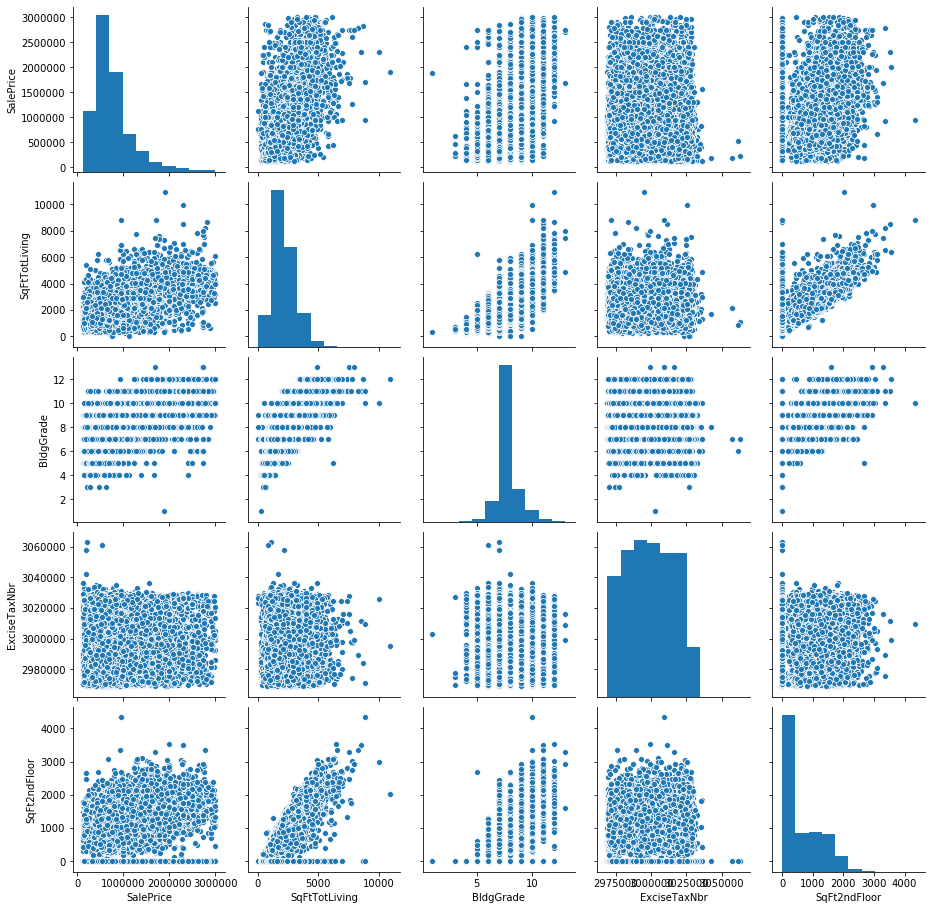

In [36]:
high_corrs_list = ['SalePrice', 'SqFtTotLiving', 'BldgGrade', 'ExciseTaxNbr', 'SqFt2ndFloor']
high_corrsdf = combo[high_corrs_list]
sns.pairplot(high_corrsdf);

In [37]:
residences['ZipCode'].value_counts()

98115         13588
98042         12064
98117         11087
98023         10815
98103         10683
              ...  
98028-8908        1
98045-9504        1
95125             1
0                 1
90055             1
Name: ZipCode, Length: 298, dtype: int64

In [38]:
resi_cols = ['SqFtTotLiving','BldgGrade','SqFtOpenPorch','SqFtEnclosedPorch','Bedrooms','YrBuilt']

In [ ]:
from sklearn.feature_selection import RFE

lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=3)
select = select.fit(X = wine.drop('SalePrice', axis=1), y = wine['quality'])

select.support_

select.ranking_